In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drought_area_pct= pd.read_csv('drought_area_pct.csv')
drought_area_total = pd.read_csv('drought_area_total.csv')

In [3]:
drought_area_pct

,MapDate,StateAbbreviation,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20210713,AK,74.35,25.65,0.00,0.00,0.00,0.0,2021-07-13,2021-07-19,2
1,20210706,AK,74.35,25.65,0.00,0.00,0.00,0.0,2021-07-06,2021-07-12,2
2,20210629,AK,85.92,14.08,0.00,0.00,0.00,0.0,2021-06-29,2021-07-05,2
3,20210622,AK,85.92,14.08,0.00,0.00,0.00,0.0,2021-06-22,2021-06-28,2
4,20210615,AK,85.92,14.08,0.00,0.00,0.00,0.0,2021-06-15,2021-06-21,2
...,...,...,...,...,...,...,...,...,...,...,...
54283,20010814,WY,0.09,31.35,14.30,29.34,24.91,0.0,2001-08-14,2001-08-20,2
54284,20010807,WY,0.59,30.85,15.78,27.96,24.83,0.0,2001-08-07,2001-08-13,2
54285,20010731,WY,8.03,24.78,14.41,27.96,24.83,0.0,2001-07-31,2001-08-06,2
54286,20010724,WY,8.03,27.72,16.00,38.93,9.32,0.0,2001-07-24,2001-07-30,2


In [4]:
drought_area_total

,MapDate,StateAbbreviation,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20210713,AK,"433,133.18","149,435.11",0.00,0.00,0.00,0.00,2021-07-13,2021-07-19,2
1,20210706,AK,"433,133.18","149,435.11",0.00,0.00,0.00,0.00,2021-07-06,2021-07-12,2
2,20210629,AK,"500,539.66","82,028.63",0.00,0.00,0.00,0.00,2021-06-29,2021-07-05,2
3,20210622,AK,"500,539.66","82,028.63",0.00,0.00,0.00,0.00,2021-06-22,2021-06-28,2
4,20210615,AK,"500,539.66","82,028.63",0.00,0.00,0.00,0.00,2021-06-15,2021-06-21,2
...,...,...,...,...,...,...,...,...,...,...,...
54283,20010814,WY,84.14,"30,662.47","13,989.11","28,697.34","24,365.56",0.00,2001-08-14,2001-08-20,2
54284,20010807,WY,577.46,"30,169.15","15,431.43","27,341.59","24,278.99",0.00,2001-08-07,2001-08-13,2
54285,20010731,WY,"7,849.39","24,234.32","14,094.33","27,340.74","24,279.84",0.00,2001-07-31,2001-08-06,2
54286,20010724,WY,"7,849.39","27,107.20","15,650.75","38,073.55","9,117.74",0.00,2001-07-24,2001-07-30,2


In [4]:
# Drop duplicate rows
drought_area_pct = drought_area_pct.drop_duplicates()
drought_area_total = drought_area_total.drop_duplicates()

# Drop rows with missing values (if any critical column is missing data)
drought_area_pct = drought_area_pct.dropna()
drought_area_total = drought_area_total.dropna()

# Reset index for cleaner DataFrames
drought_area_pct.reset_index(drop=True, inplace=True)
drought_area_total.reset_index(drop=True, inplace=True)

# Display the cleaned datasets
print("Cleaned Drought Area Percent Data:")
print(drought_area_pct)

print("\nCleaned Drought Area Total Data:")
print(drought_area_total)

Cleaned Drought Area Percent Data:
        MapDate StateAbbreviation   None     D0     D1     D2     D3   D4  \
0      20210713                AK  74.35  25.65   0.00   0.00   0.00  0.0   
1      20210706                AK  74.35  25.65   0.00   0.00   0.00  0.0   
2      20210629                AK  85.92  14.08   0.00   0.00   0.00  0.0   
3      20210622                AK  85.92  14.08   0.00   0.00   0.00  0.0   
4      20210615                AK  85.92  14.08   0.00   0.00   0.00  0.0   
...         ...               ...    ...    ...    ...    ...    ...  ...   
54283  20010814                WY   0.09  31.35  14.30  29.34  24.91  0.0   
54284  20010807                WY   0.59  30.85  15.78  27.96  24.83  0.0   
54285  20010731                WY   8.03  24.78  14.41  27.96  24.83  0.0   
54286  20010724                WY   8.03  27.72  16.00  38.93   9.32  0.0   
54287  20010717                WY   5.68  29.87  16.20  38.93   9.32  0.0   

       ValidStart    ValidEnd  Statistic

# 1. Time-Series Analysis: Trends in Drought Severity
Line Plot of Drought Severity Over Time for a State

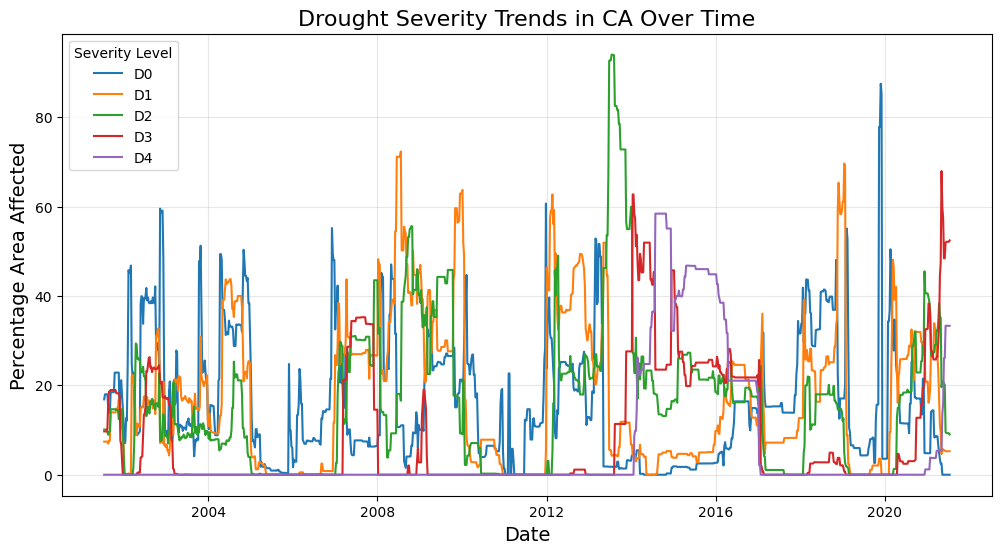

In [5]:
# Convert 'ValidStart' to datetime for time-series analysis
drought_area_pct['ValidStart'] = pd.to_datetime(drought_area_pct['ValidStart'])

numeric_columns = ['D0', 'D1', 'D2', 'D3', 'D4']
state_data = drought_area_pct[['StateAbbreviation', 'ValidStart'] + numeric_columns]

# Aggregate data by state and date for visualization
state_data = state_data.groupby(['StateAbbreviation', 'ValidStart']).mean().reset_index()

# Select a specific state for analysis
selected_state = "CA"  # Change this to any state abbreviation
state_trend = state_data[state_data['StateAbbreviation'] == selected_state]

# Plot trends for each drought severity category
plt.figure(figsize=(12, 6))
severity_levels = ['D0', 'D1', 'D2', 'D3', 'D4']
for level in severity_levels:
    plt.plot(state_trend['ValidStart'], state_trend[level], label=level)

plt.title(f"Drought Severity Trends in {selected_state} Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Percentage Area Affected", fontsize=14)
plt.legend(title="Severity Level")
plt.grid(alpha=0.3)
plt.show()


This line plot shows the changes in drought severity (D0 to D4) over time for a specific state, providing a time-series visualization.
Significance: It highlights temporal patterns or trends, such as increasing drought severity over summer months or drought alleviation after rainy seasons.
Future Study: Analyze the relationship between these trends and external factors such as rainfall, temperature, or water management policies.



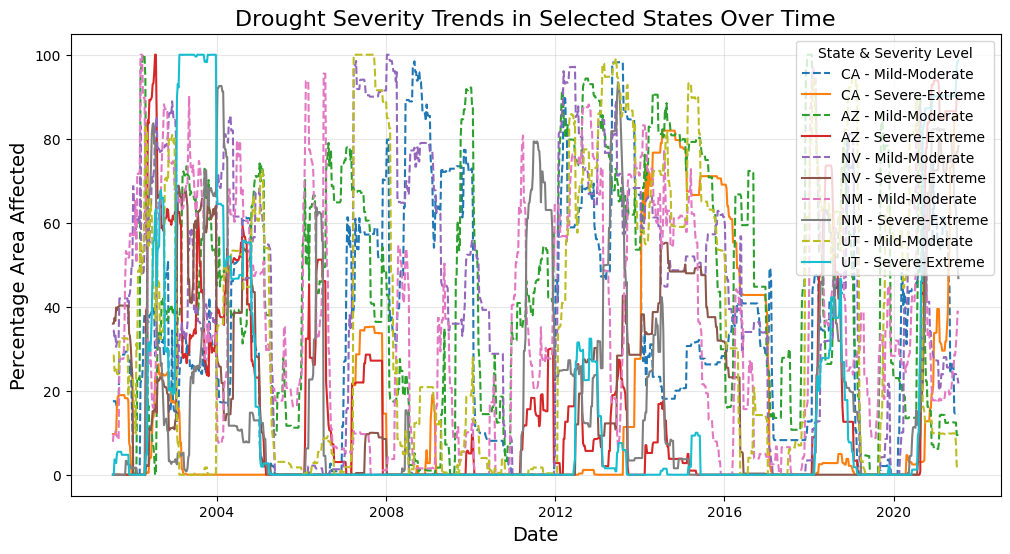

In [ ]:
# Convert 'ValidStart' to datetime
drought_area_pct['ValidStart'] = pd.to_datetime(drought_area_pct['ValidStart'])

# Define relevant columns
numeric_columns = ['D0', 'D1', 'D2', 'D3', 'D4']
state_data = drought_area_pct[['StateAbbreviation', 'ValidStart'] + numeric_columns]

# Aggregate data by state and date
state_data = state_data.groupby(['StateAbbreviation', 'ValidStart']).mean().reset_index()

# Group D0 and D1 into 'Mild-Moderate', D3 and D4 into 'Severe-Extreme'
state_data['Mild-Moderate'] = state_data['D1'] + state_data['D2']
state_data['Severe-Extreme'] = state_data['D3'] + state_data['D4']

# Filter for selected states
selected_states = ["CA", "AZ", "NV", "NM", "UT"]
state_trend = state_data[state_data['StateAbbreviation'].isin(selected_states)]

# Plot trends for each state
plt.figure(figsize=(12, 6))
for state in selected_states:
    state_subset = state_trend[state_trend['StateAbbreviation'] == state]
    plt.plot(state_subset['ValidStart'], state_subset['Mild-Moderate'], label=f"{state} - Mild-Moderate", linestyle='dashed')
    plt.plot(state_subset['ValidStart'], state_subset['Severe-Extreme'], label=f"{state} - Severe-Extreme")

plt.title("Drought Severity Trends in Selected States Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Percentage Area Affected", fontsize=14)
plt.legend(title="State & Severity Level")
plt.grid(alpha=0.3)
plt.show()


/var/folders/cq/p_chwn9x2t35s219lxhwjrd80000gn/T/ipykernel_80536/796442464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_subset['Mild-Moderate (Smoothed)'] = state_subset['Mild-Moderate'].rolling(window=7).mean()
/var/folders/cq/p_chwn9x2t35s219lxhwjrd80000gn/T/ipykernel_80536/796442464.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_subset['Severe-Extreme (Smoothed)'] = state_subset['Severe-Extreme'].rolling(window=7).mean()
/var/folders/cq/p_chwn9x2t35s219lxhwjrd80000gn/T/ipykernel_

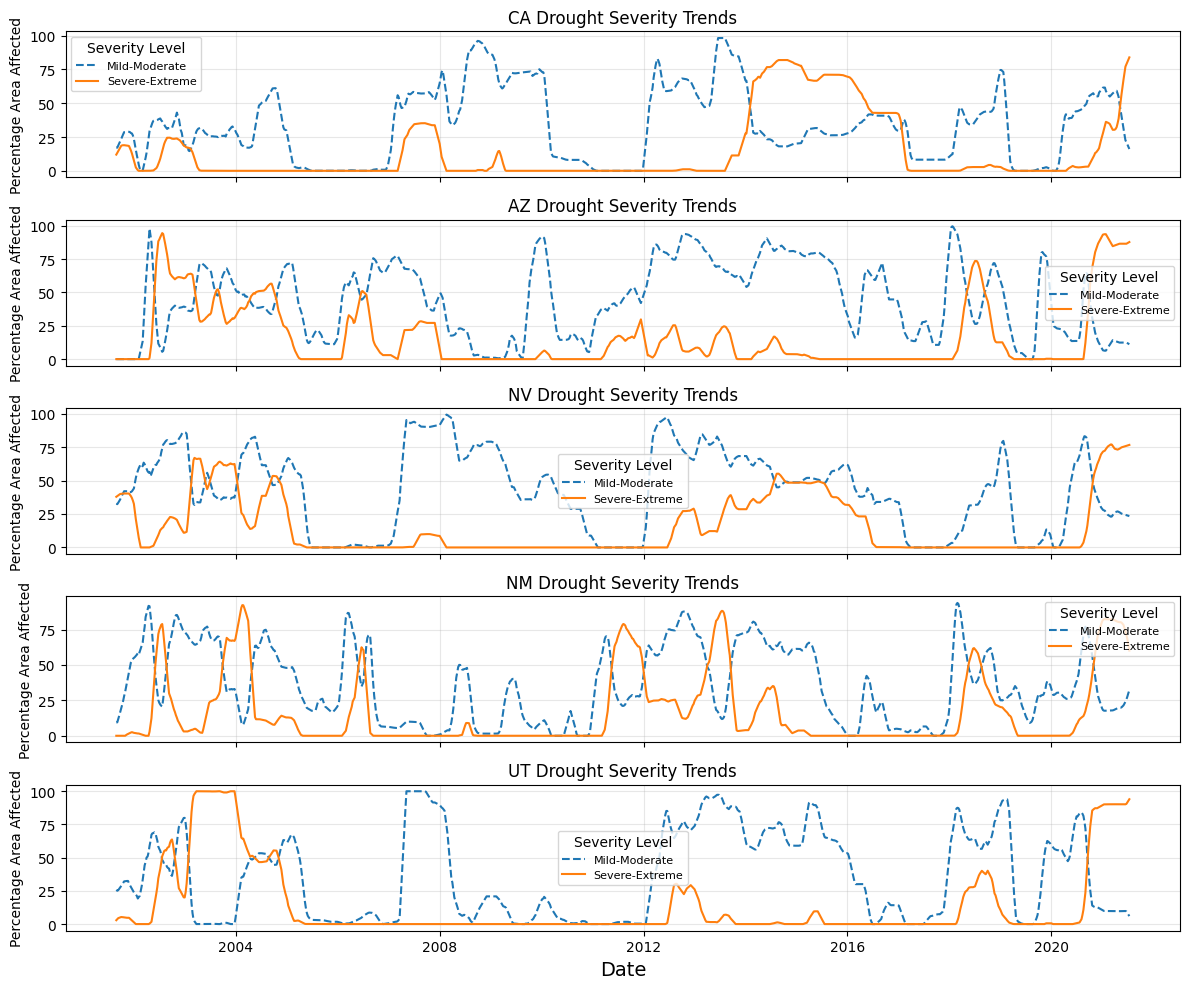

In [10]:
# Plot trends for each state in separate subplots
fig, axes = plt.subplots(nrows=len(selected_states), ncols=1, figsize=(12, 10), sharex=True)

# Loop through selected states and plot on individual subplots
for i, state in enumerate(selected_states):
    state_subset = state_trend[state_trend['StateAbbreviation'] == state]
    
    # Apply rolling average to smooth the data (7-day window)
    state_subset['Mild-Moderate (Smoothed)'] = state_subset['Mild-Moderate'].rolling(window=7).mean()
    state_subset['Severe-Extreme (Smoothed)'] = state_subset['Severe-Extreme'].rolling(window=7).mean()
    
    axes[i].plot(state_subset['ValidStart'], state_subset['Mild-Moderate (Smoothed)'], label="Mild-Moderate", linestyle='dashed')
    axes[i].plot(state_subset['ValidStart'], state_subset['Severe-Extreme (Smoothed)'], label="Severe-Extreme")
    axes[i].set_title(f"{state} Drought Severity Trends", fontsize=12)
    axes[i].set_ylabel("Percentage Area Affected", fontsize=10)
    axes[i].legend(title="Severity Level", fontsize=8)
    axes[i].grid(alpha=0.3)

# Common x-axis label
plt.xlabel("Date", fontsize=14)
plt.tight_layout()
plt.show()


# 2. Heatmap: State-Level Severity Over Time
Heatmap of Average Drought Severity by State

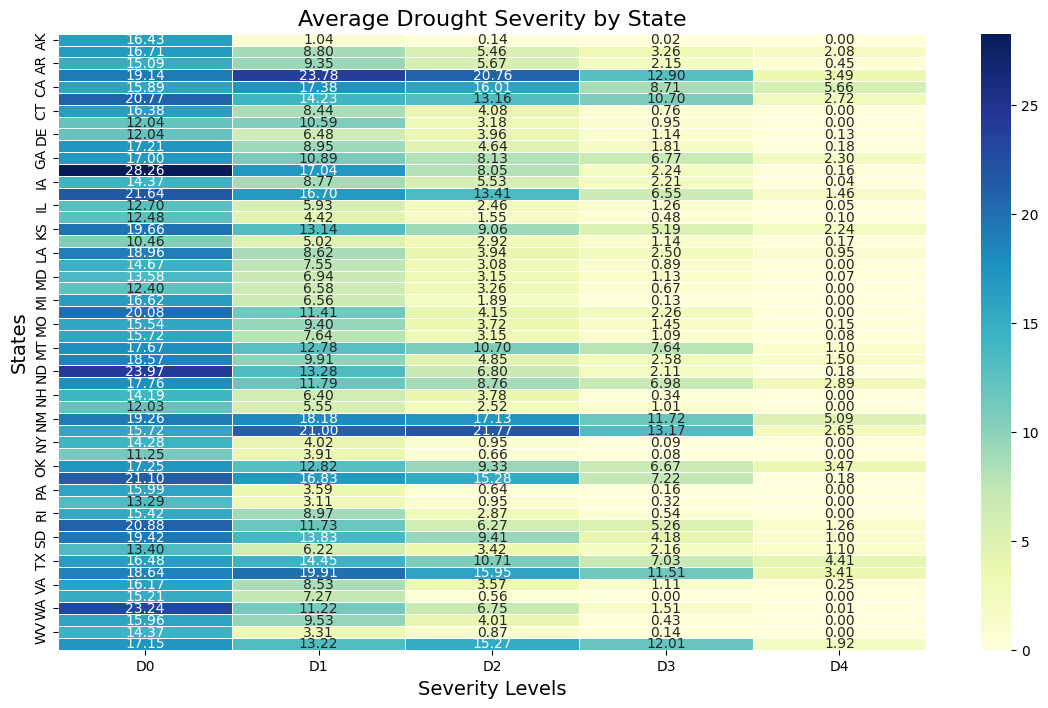

In [58]:
state_avg_severity = drought_area_pct.groupby('StateAbbreviation')[['D0', 'D1', 'D2', 'D3', 'D4']].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(state_avg_severity, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Average Drought Severity by State", fontsize=16)
plt.xlabel("Severity Levels", fontsize=14)
plt.ylabel("States", fontsize=14)
plt.show()

This heatmap visualizes the average drought severity levels (D0 to D4) for each state, showing spatial patterns of drought intensity.
Significance: It identifies regions with consistently high or low drought levels, helping to pinpoint states that may need targeted drought mitigation strategies.
Future Study: Expand this analysis by including regional factors like soil composition, agricultural activity, and climate to understand why some states are more drought-prone.



# 3. Correlation Matrix: Relationships Between Variables
Correlation Heatmap

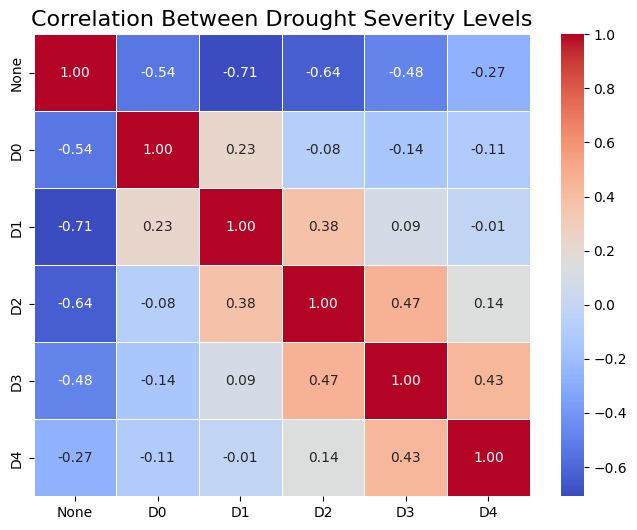

In [56]:
# Compute the correlation matrix for drought percentages
correlation_matrix = drought_area_pct[['None', 'D0', 'D1', 'D2', 'D3', 'D4']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Drought Severity Levels", fontsize=16)
plt.show()

This heatmap displays correlations between drought severity levels and unaffected areas, revealing relationships between different drought categories.
Significance: It shows whether higher severity levels (e.g., D4) are associated with reductions in lower severity levels (e.g., D0) or unaffected areas.
Future Study: Investigate how these relationships vary seasonally or regionally, and integrate external data (e.g., wildfire occurrences) to explore cascading effects of severe droughts.

# 4. State-Level Distribution
Bar Plot of Total Area Affected by Severity Level

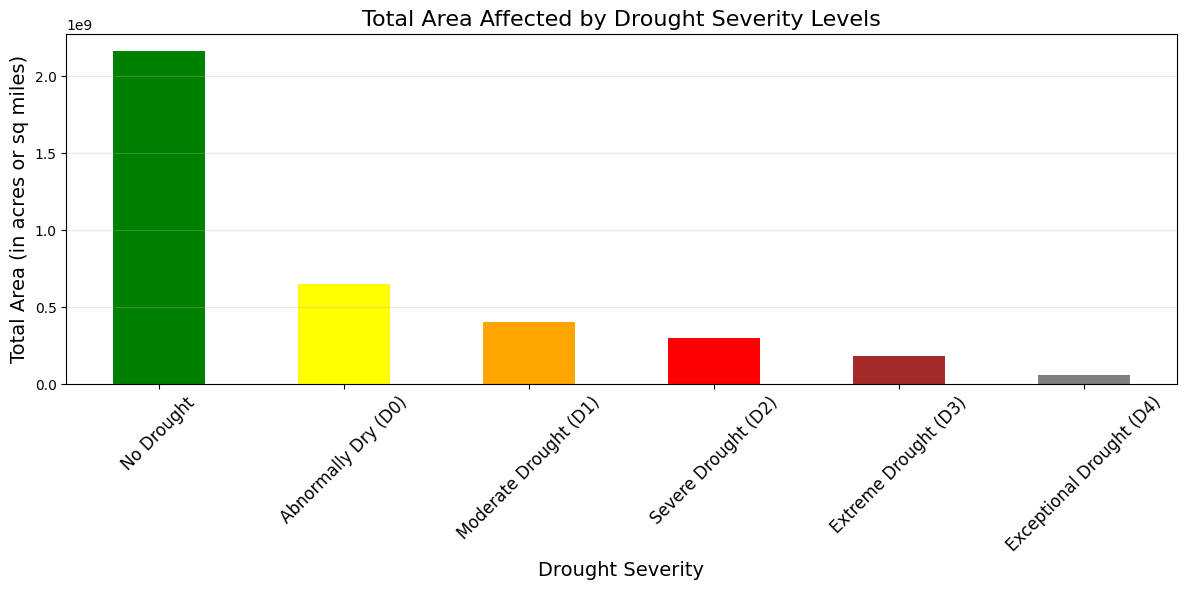

In [60]:
severity_totals = drought_area_total[['None', 'D0', 'D1', 'D2', 'D3', 'D4']].replace(',', '', regex=True).astype(float).sum()
severity_totals.index = ['No Drought', 'Abnormally Dry (D0)', 'Moderate Drought (D1)', 'Severe Drought (D2)', 'Extreme Drought (D3)', 'Exceptional Drought (D4)']

plt.figure(figsize=(12, 6))
severity_totals.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'brown', 'gray'])

plt.title("Total Area Affected by Drought Severity Levels", fontsize=16)
plt.xlabel("Drought Severity", fontsize=14)
plt.ylabel("Total Area (in acres or sq miles)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

This bar plot displays the total area affected by each drought severity level across all states.
Significance: It helps to assess the scale of drought impact by severity, showing which levels of drought affect the largest land areas.
Future Study: Compare the total affected areas with economic data, such as agricultural losses or water shortages, to quantify the socio-economic impact of droughts.

# 5. Seasonal Trends
Code: Box Plot of Drought Severity by Month

/var/folders/cq/p_chwn9x2t35s219lxhwjrd80000gn/T/ipykernel_51645/3682439439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=drought_area_pct, x='Month', y='D0', palette="Set3")


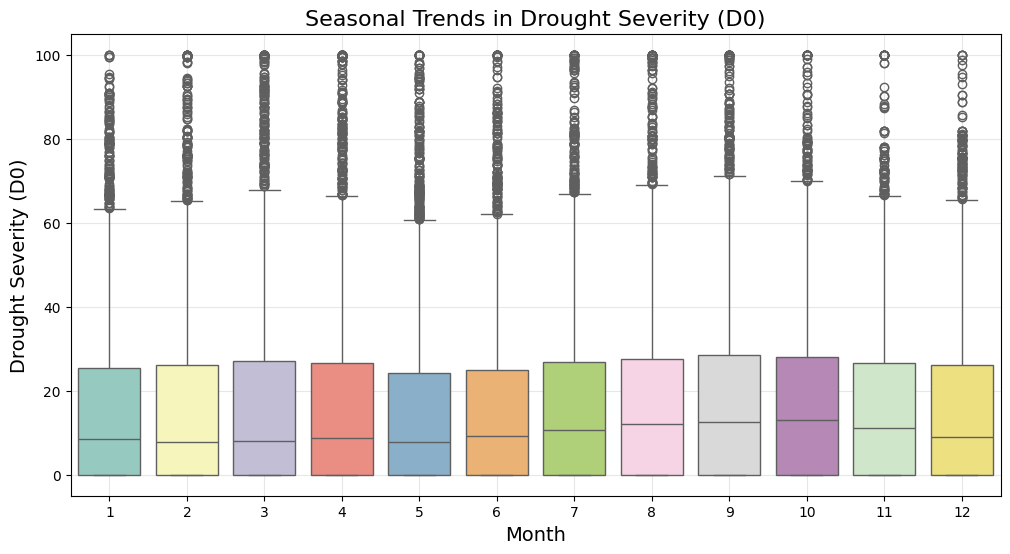

In [42]:
# Extract month from the date
drought_area_pct['Month'] = drought_area_pct['ValidStart'].dt.month

# Create a box plot for seasonal trends
plt.figure(figsize=(12, 6))
sns.boxplot(data=drought_area_pct, x='Month', y='D0', palette="Set3")

plt.title("Seasonal Trends in Drought Severity (D0)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Drought Severity (D0)", fontsize=14)
plt.grid(alpha=0.3)
plt.show();

This box plot examines how drought severity levels (e.g., D0) vary across months, revealing seasonal trends.
Significance: It highlights peak drought months, helping to prepare for periods of high drought risk, such as summer in arid regions.
Future Study: Compare seasonal trends across different years or states to study climate change impacts, and analyze whether proactive water management policies can mitigate seasonal drought severity.